In [1]:
from datetime import datetime
start = datetime.now()

## Steps 01 to 03> 
1. Download the customer data set and add it to your “Original Data” folder.
2.	Create a new notebook in your “Scripts” folder for part 1 of this task.
3.	Import your analysis libraries, as well as your new customer data set as a dataframe.


In [2]:
# import libraries
import pandas as pd
import numpy as np
import os

# set 'root' directory
ICpath = r'C:\Users\joseh\Instacart Basket Analysis'

# import dataviz libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# import dataset
customers = pd.read_csv(os.path.join(ICpath,'02 Data','Original Data','customers.csv'))

In [3]:
# review imported dataset
customers

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374
...,...,...,...,...,...,...,...,...,...,...
206204,168073,Lisa,Case,Female,North Carolina,44,4/1/2020,1,married,148828
206205,49635,Jeremy,Robbins,Male,Hawaii,62,4/1/2020,3,married,168639
206206,135902,Doris,Richmond,Female,Missouri,66,4/1/2020,2,married,53374
206207,81095,Rose,Rollins,Female,California,27,4/1/2020,1,married,99799


## Steps 04 - 05 > 
4. Wrangle the data so that it follows consistent logic; for example, rename columns with illogical names and drop columns that don’t add anything to your analysis.
5.	Complete the fundamental data quality and consistency checks you’ve learned throughout this Achievement; for example, check for and address missing values and duplicates, and convert any mixed-type data.

In [4]:
customers.columns

Index(['user_id', 'First Name', 'Surnam', 'Gender', 'STATE', 'Age',
       'date_joined', 'n_dependants', 'fam_status', 'income'],
      dtype='object')

#### Renaming columns to meaningful names, and all in lowercase

In [5]:
customers.rename(columns = {'First Name':'first_name' ,
                            'Surnam':'last_name',
                            'Gender':'gender',
                            'STATE':'state',
                            'Age':'age',
                            'n_dependants':'dependants',
                            'fam_status':'marital_status'},
                inplace=True)

In [6]:
# verify renaming of columns
customers.columns

Index(['user_id', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'dependants', 'marital_status', 'income'],
      dtype='object')

In [7]:
# verify datatypes
customers.dtypes

user_id            int64
first_name        object
last_name         object
gender            object
state             object
age                int64
date_joined       object
dependants         int64
marital_status    object
income             int64
dtype: object

In [8]:
customers.duplicated().sum()

0

#### No duplicates found

In [9]:
customers[customers['first_name'].isnull()==True]

,user_id,first_name,last_name,gender,state,age,date_joined,dependants,marital_status,income
53,76659,NaN,Gilbert,Male,Colorado,26,1/1/2017,2,married,41709
73,13738,NaN,Frost,Female,Louisiana,39,1/1/2017,0,single,82518
82,89996,NaN,Dawson,Female,Oregon,52,1/1/2017,3,married,117099
99,96166,NaN,Oconnor,Male,Oklahoma,51,1/1/2017,1,married,155673
105,29778,NaN,Dawson,Female,Utah,63,1/1/2017,3,married,151819
...,...,...,...,...,...,...,...,...,...,...
206038,121317,NaN,Melton,Male,Pennsylvania,28,3/31/2020,3,married,87783
206044,200799,NaN,Copeland,Female,Hawaii,52,4/1/2020,2,married,108488
206090,167394,NaN,Frost,Female,Hawaii,61,4/1/2020,1,married,45275
206162,187532,NaN,Floyd,Female,California,39,4/1/2020,0,single,56325


In [10]:
# checking columns with mixed data types
for col in customers.columns.tolist():
  weird = (customers[[col]].applymap(type) != customers[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (customers[weird]) > 0:
    print (col)

first_name


### the only column with a mixed data type is ```first_name```

In [11]:
# checking how many entries have valid first_name(s)
name_count = customers['first_name'].value_counts()
total=0
for x in name_count:
    total += x
print(total)

194950


#### Since the dataframe has 206,209 rows $=>$ and there are 194,950 valid names. There are 11,259 entries with a different data type or unknown values

#### Further inspection (_see following code cell_) shows the "mixed" data types are due to NaN values (i.e. missing ```first_name```s)

In [12]:
customers[customers['first_name'].isnull()==True]

,user_id,first_name,last_name,gender,state,age,date_joined,dependants,marital_status,income
53,76659,NaN,Gilbert,Male,Colorado,26,1/1/2017,2,married,41709
73,13738,NaN,Frost,Female,Louisiana,39,1/1/2017,0,single,82518
82,89996,NaN,Dawson,Female,Oregon,52,1/1/2017,3,married,117099
99,96166,NaN,Oconnor,Male,Oklahoma,51,1/1/2017,1,married,155673
105,29778,NaN,Dawson,Female,Utah,63,1/1/2017,3,married,151819
...,...,...,...,...,...,...,...,...,...,...
206038,121317,NaN,Melton,Male,Pennsylvania,28,3/31/2020,3,married,87783
206044,200799,NaN,Copeland,Female,Hawaii,52,4/1/2020,2,married,108488
206090,167394,NaN,Frost,Female,Hawaii,61,4/1/2020,1,married,45275
206162,187532,NaN,Floyd,Female,California,39,4/1/2020,0,single,56325


In [13]:
# the best approach is to create a column to flag whether first_name is missing
customers['missing_first_name'] = customers['first_name'].isnull()

In [14]:
# verifying change made
customers['missing_first_name'].value_counts()

False    194950
True      11259
Name: missing_first_name, dtype: int64

In [15]:
customers.duplicated().sum()

0

In [16]:
#making sure there are no duplicate user_id(s)
customers['user_id'].duplicated().sum()

0

In [17]:
customers['user_id'].max()

206209

In [18]:
customers

,user_id,first_name,last_name,gender,state,age,date_joined,dependants,marital_status,income,missing_first_name
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,False
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,False
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568,False
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049,False
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374,False
...,...,...,...,...,...,...,...,...,...,...,...
206204,168073,Lisa,Case,Female,North Carolina,44,4/1/2020,1,married,148828,False
206205,49635,Jeremy,Robbins,Male,Hawaii,62,4/1/2020,3,married,168639,False
206206,135902,Doris,Richmond,Female,Missouri,66,4/1/2020,2,married,53374,False
206207,81095,Rose,Rollins,Female,California,27,4/1/2020,1,married,99799,False


## Steps 06 - 07>
6.	Combine your customer data with the rest of your prepared Instacart data. (Hint: Make sure the key columns are the same data type!)
7.	Ensure your notebook contains logical titles, section headings, and descriptive code comments.

In [19]:
#import pickle file with most recent updates
# import dataset 
ords_prods_merge = pd.read_pickle(os.path.join(ICpath, '02 Data','Prepared Data','orders_products_aggregated.pkl'))
ords_prods_merge.rename(columns={'order_dow':'order_day_of_week'}, inplace=True)
ords_prods_merge

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order_from_customer,product_id,add_to_cart_order,reordered,...,department_id,prices,price_label,busiest_day,Busiest_Days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,order_frequency_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,7,9.0,Mid-range product,Regular busy,regular busy,Most orders,10,New customer,Low spender,Non-frequent customer
1,2398795,1,2,3,7,15.0,False,196,1,1,...,7,9.0,Mid-range product,Regular busy,slowest days,Average orders,10,New customer,Low spender,Non-frequent customer
2,473747,1,3,3,12,21.0,False,196,1,1,...,7,9.0,Mid-range product,Regular busy,slowest days,Most orders,10,New customer,Low spender,Non-frequent customer
3,2254736,1,4,4,7,29.0,False,196,1,1,...,7,9.0,Mid-range product,Least busy,slowest days,Average orders,10,New customer,Low spender,Non-frequent customer
4,431534,1,5,4,15,28.0,False,196,1,1,...,7,9.0,Mid-range product,Least busy,slowest days,Most orders,10,New customer,Low spender,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,1320836,202557,17,2,15,1.0,False,43553,2,1,...,7,3.7,Low-range product,Regular busy,regular busy,Most orders,31,Regular customer,Low spender,Frequent customer
32404855,31526,202557,18,5,11,3.0,False,43553,2,1,...,7,3.7,Low-range product,Regular busy,regular busy,Most orders,31,Regular customer,Low spender,Frequent customer
32404856,758936,203436,1,2,7,NaN,True,42338,4,0,...,19,6.9,Mid-range product,Regular busy,regular busy,Average orders,3,New customer,Low spender,Regular customer
32404857,2745165,203436,2,3,5,15.0,False,42338,16,1,...,19,6.9,Mid-range product,Regular busy,slowest days,Fewest orders,3,New customer,Low spender,Regular customer


In [20]:
ords_prods_merge['user_id'].max()

206209

In [21]:
customers.columns

Index(['user_id', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'dependants', 'marital_status', 'income',
       'missing_first_name'],
      dtype='object')

#### In the dataset ```customers``` we do not need to bring the fields that can identify a person (we need to anonymize)
* ```age``` -- the issue I see with this is that age is not accurate and it would be best to have the year the person was born
* ```first_name```
* ```last_name```
* ```missing_first_name```

#### On the other hand we can use ```age``` and ```date_joined``` to derive the year of birth considering the age declared at the time of regsitration is relative to the date the user joined. Though the operation YEAR_JOINED - AGE is not 100% accurate it should bring us within 1-2 years provided the declared age was true. Let's see how to do that next

In [22]:
# removing columns to anonymize data
customers2 = customers.drop(columns=['first_name','last_name','age','missing_first_name'])

In [23]:
# extract the year (as an integer) in which each user joined InstaCart
year_joined = []
for mmddyyyy in customers2['date_joined']:
    year_joined.append(int( mmddyyyy[-4:]) )

In [24]:
# derive the birth year (approximate) based on age at the time the user joined
customers2['birth_year'] = year_joined - customers['age']

In [25]:
# verify the results
customers2

,user_id,gender,state,date_joined,dependants,marital_status,income,birth_year
0,26711,Female,Missouri,1/1/2017,3,married,165665,1969
1,33890,Female,New Mexico,1/1/2017,0,single,59285,1981
2,65803,Male,Idaho,1/1/2017,2,married,99568,1982
3,125935,Female,Iowa,1/1/2017,0,single,42049,1977
4,130797,Female,Maryland,1/1/2017,1,married,40374,1991
...,...,...,...,...,...,...,...,...
206204,168073,Female,North Carolina,4/1/2020,1,married,148828,1976
206205,49635,Male,Hawaii,4/1/2020,3,married,168639,1958
206206,135902,Female,Missouri,4/1/2020,2,married,53374,1954
206207,81095,Female,California,4/1/2020,1,married,99799,1993


In [26]:
# what columns do we have in ords_prods_merge
ords_prods_merge.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order',
       'first_order_from_customer', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       'price_label', 'busiest_day', 'Busiest_Days', 'busiest_period_of_day',
       'max_order', 'loyalty_flag', 'spending_flag', 'order_frequency_flag'],
      dtype='object')

#### It is possible to merge/join the two data sets based on user_id --there's no other common field
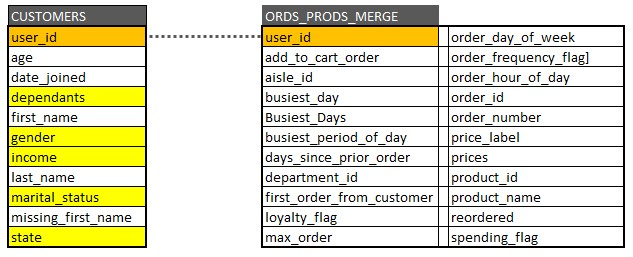

In [27]:
# checking the number of unique user_id's in ords_prods_merge
(~ords_prods_merge['user_id'].duplicated()).sum()

206209

In [28]:
# checking the number of unique user_id's in customers
(~customers2['user_id'].duplicated()).sum()

206209

In [29]:
ords_prods_cxs_merge = ords_prods_merge.merge(customers2, on = 'user_id', indicator = True)

In [30]:
ords_prods_cxs_merge['_merge'].value_counts()

both          32404859
left_only            0
right_only           0
Name: _merge, dtype: int64

In [31]:
#eliminate the extra column used to verify the results of the join/merge
ords_prods_cxs_merge.drop(columns = ['_merge'], inplace = True)

In [32]:
ords_prods_cxs_merge

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order_from_customer,product_id,add_to_cart_order,reordered,...,loyalty_flag,spending_flag,order_frequency_flag,gender,state,date_joined,dependants,marital_status,income,birth_year
0,2539329,1,1,2,8,NaN,True,196,1,0,...,New customer,Low spender,Non-frequent customer,Female,Alabama,2/17/2019,3,married,40423,1988
1,2398795,1,2,3,7,15.0,False,196,1,1,...,New customer,Low spender,Non-frequent customer,Female,Alabama,2/17/2019,3,married,40423,1988
2,473747,1,3,3,12,21.0,False,196,1,1,...,New customer,Low spender,Non-frequent customer,Female,Alabama,2/17/2019,3,married,40423,1988
3,2254736,1,4,4,7,29.0,False,196,1,1,...,New customer,Low spender,Non-frequent customer,Female,Alabama,2/17/2019,3,married,40423,1988
4,431534,1,5,4,15,28.0,False,196,1,1,...,New customer,Low spender,Non-frequent customer,Female,Alabama,2/17/2019,3,married,40423,1988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,156685,106143,26,4,23,5.0,False,19675,1,1,...,Regular customer,High spender,Frequent customer,Male,Hawaii,5/26/2017,0,single,53755,1992
32404855,484769,66343,1,6,11,NaN,True,47210,1,0,...,New customer,Low spender,Non-frequent customer,Female,Tennessee,9/12/2017,3,married,46151,1995
32404856,1561557,66343,2,1,11,30.0,False,47210,1,1,...,New customer,Low spender,Non-frequent customer,Female,Tennessee,9/12/2017,3,married,46151,1995
32404857,276317,66343,3,6,15,19.0,False,47210,1,1,...,New customer,Low spender,Non-frequent customer,Female,Tennessee,9/12/2017,3,married,46151,1995


## Steps 08-09>
8.	Export this new dataframe as a pickle file so you can continue to use it in the second part of this task.
9.	Save your notebook so that you can send it to your tutor for review after completing part 2.

In [33]:
# export the recently merged dataframe
ords_prods_cxs_merge.to_pickle(os.path.join(ICpath,'02 Data','Prepared Data','orders_products_customers.pkl'))

In [34]:
# time when notebook finishes
print('time to run notebook: ',datetime.now() - start)

time to run notebook:  0:02:34.407721


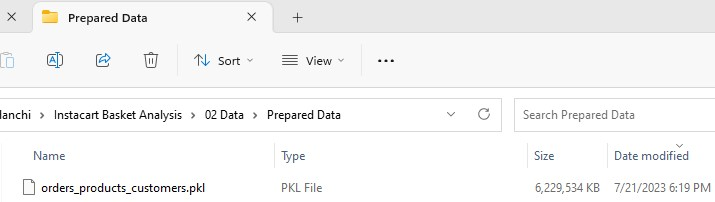

In [35]:
customers.shape

(206209, 11)

In [36]:
customers2.shape

(206209, 8)